In [10]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

## Zadanie 1

In [36]:
try:
    data = pd.read_csv("medicine.txt", header=0, delimiter=",")
except Exception as e:
    print(f"Błąd podczas wczytywania pliku: {e}")
    exit()
print(data.head())

   Presence 1  Presence 2  Was medicine effective?
0     0.04609     6010.05                        0
1     0.02237     6119.66                        0
2     0.05054     7037.36                        0
3     0.03155     5009.20                        0
4     0.02256     6214.69                        0


In [64]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# X_mean = np.mean(X, axis=0)
# X_std = np.std(X, axis=0)
# X = (X - X_mean) / X_std

print("Kształt X:", X.shape)
print("Kształt y:", y.shape)
print("Unikalne wartości w y:", np.unique(y))
print("Czy są NaN w X?", np.isnan(X).any())
print("Czy są NaN w y?", np.isnan(y).any())


Kształt X: (1350, 2)
Kształt y: (1350,)
Unikalne wartości w y: [0 1]
Czy są NaN w X? False
Czy są NaN w y? False


In [65]:

# Calculate the IQR for each feature
q1 = np.percentile(X, 25, axis=0)
q3 = np.percentile(X, 75, axis=0)
IQR = q3 - q1

# Define the lower and upper bounds for each feature
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Create a boolean mask to filter out the outliers
mask = np.all((X >= lower_bound) & (X <= upper_bound), axis=1)

# Apply the mask to X and y
X = X[mask]
y = y[mask]

print("Kształt X po usunięciu outlierów:", X.shape)

Kształt X po usunięciu outlierów: (1285, 2)


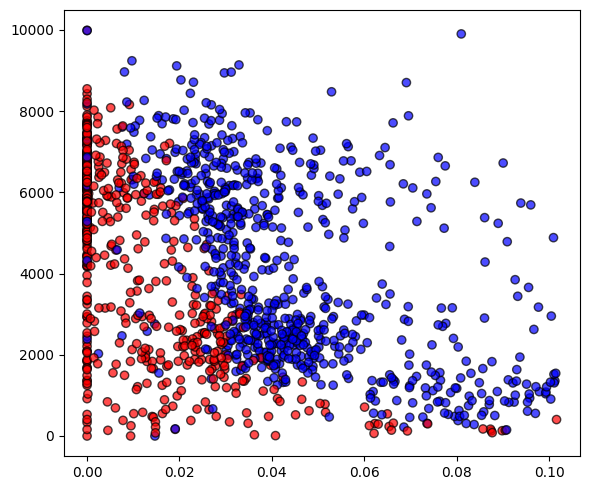

In [67]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.7)
plt.tight_layout()
plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

# Standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(solver='adam',hidden_layer_sizes=(5, 5), max_iter = 2000, tol = 0.001, activation = 'identity') # logistic, tanh, relu, identity

model.fit(X, y)

# Ocena modelu
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Train accuracy: {train_accuracy}")
print('score:', model.score(X,y))
print('confusion matrix:\n', confusion_matrix(y, model.predict(X)))

Train accuracy: 0.5778210116731517
score: 0.5750972762645914
confusion matrix:
 [[738   5]
 [541   1]]


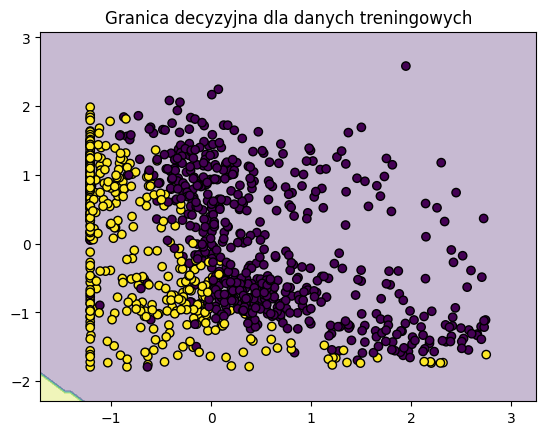

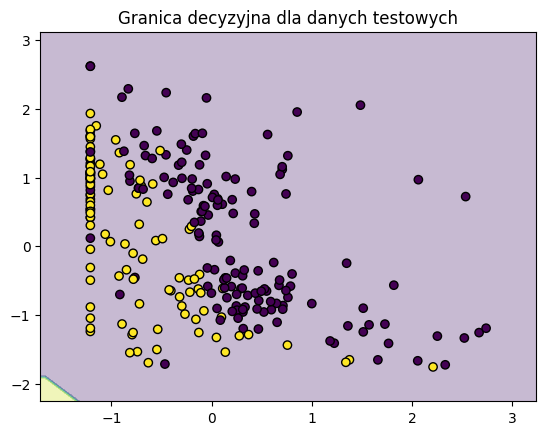

In [73]:
# Wizualizacja decyzji modelu
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

fig, ax = plt.subplots()
plot_decision_boundary(model, X_train, y_train, ax)
ax.set_title("Granica decyzyjna dla danych treningowych")
plt.show()

fig, ax = plt.subplots()
plot_decision_boundary(model, X_test, y_test, ax)
ax.set_title("Granica decyzyjna dla danych testowych")
plt.show()